# [SemEval-2023 Task 9 - Multilingual Tweet Intimacy Analysis](https://codalab.lisn.upsaclay.fr/competitions/7096)

This [SemEval shared task](https://sites.google.com/umich.edu/semeval-2023-tweet-intimacy) focuses on predicting the intimacy of tweets in 10+ languages. 


## [The dataset MINT](https://arxiv.org/abs/2210.01108) 

MINT is a new Multilingual intimacy analysis dataset. It covers tweets in 6 languages as the training data, including English, Spanish, French, Portuguese, Italian, and Chinese. A total of 12,000 tweets are annotated for the 6 languages. It also include a small test set for Dutch, Korean, Hindi, and Arabic (500 tweets for each). Thus, the dataset has a total of 13,384 tweets in 10 languages including English, French, Spanish, Italian, Portuguese, Korean, Dutch, Chinese, Hindi, and Arabic.

Intimacy is annotated using a 5-point Likert scale where 1 indicates “Not intimate at all” and 5 indicates “Very intimate”.

For each language in the training set, we collected annotations for 2,000 tweets. 


Although IAA [(Krippendorff’s)](https://en.wikipedia.org/wiki/Krippendorff%27s_alpha) is moderate (between 0.44 and 0.61), it is promising because the subjective nature of intimacy perception.


The final dataset for English, Spanish, French, Italian, Portuguese, and Chinese is split into training, validation, and test sets following a ratio of 7:1:2, and all the tweets are held as the test set for Arabic, Dutch, Korean, and Hindi.



## Data


In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
PATH = "/content/drive/My Drive/Colab Notebooks/data/intimacy/"

df_train = pd.read_csv(PATH+"train-full.csv") 
df_test = pd.read_csv(PATH+"test_labeled.csv") 

print('dataset training was loaded:', df_train.shape)
print('dataset test was loaded:', df_test.shape)
print('dataset total:', df_train.shape[0]+ df_test.shape[0])


Mounted at /content/drive
dataset training was loaded: (9491, 3)
dataset test was loaded: (3881, 3)
dataset total: 13372


In [2]:
df_train.head()

,text,label,language
0,wearing a fake engagement ring so guys won’t a...,1.8,English
1,Bees vs. Wasps. http,1.0,English
2,Here is a nice equation: 0+0-0-0+0=0,1.0,English
3,@user @user Enjoy each new day!😊🇨🇦🐞🐭,1.6,English
4,I can be having a perfectly good day then I th...,1.6,English


In [10]:
df_train=df_train[df_train['language']=='English']
df_train=df_train[df_train['label']>4.0]

df_train.head(30)

,text,label,language
13,Dm to buy full vids of local coloured mense fu...,4.400000,English
96,Eat her out dick her down cuddle up,5.000000,English
394,did you finger her back or eat her out or anyt...,4.800000,English
418,Ana would like you to see her hot ass http http,4.800000,English
474,@user I would make you a lucky guy if you want...,4.200000,English
548,But like I don’t want to and can’t leave him. ...,4.400000,English
643,Join me If you want to enjoy your bath time💦 http,4.200000,English
657,Thick AF Latina MILF with great tits and DSLs ...,4.200000,English
671,@user U like that ass ate baby,5.000000,English
690,Finding out that Riley needs to have surgery h...,4.400000,English


## Distribution of the language in the datasets


In [ ]:
counts_train = df_train['language'].value_counts().reset_index()
counts_train.columns = ['language', 'counts']
print('Languages in training: ', df_train['language'].unique())
print("Distribution in training:", counts_train)
print()
counts_test = df_test['language'].value_counts().reset_index()
counts_test.columns = ['language', 'counts']
print('Languages in test: ', df_test['language'].unique())
print("Distribution in test:", counts_test)


Languages in training:  ['English' 'Spanish' 'Portuguese' 'Italian' 'French' 'Chinese']
Distribution in training:      language  counts
0  Portuguese    1596
1     Chinese    1596
2     Spanish    1592
3      French    1588
4     English    1587
5     Italian    1532

Languages in test:  ['Korean' 'French' 'English' 'Italian' 'Chinese' 'Spanish' 'Hindi'
 'Arabic' 'Portuguese' 'Dutch']
Distribution in test:      language  counts
0       Dutch     413
1      Korean     411
2      Arabic     407
3     Chinese     400
4     Spanish     399
5  Portuguese     398
6     English     396
7      French     393
8     Italian     384
9       Hindi     280


The languages in training are six: 'Portuguese', 'Chinese', 'Spanish', 'French', 'English', 'Italian'. In the **test dataset**, there are four languages more: **'Korean', 'Dutch', 'Arabic',  'Hindi'**. 


In [ ]:
colors = ['deepskyblue', 'coral', 'olivedrab',
          'blue', 'brown', 
          'purple','orange', 'green',  'red' ,'darkviolet']
labels = counts_test['language'].tolist()
print(labels)
dict_color = dict(zip(labels, colors))
dict_color
c_train = counts_train['language'].apply(lambda x: dict_color[x]).tolist()
c_test = counts_test['language'].apply(lambda x: dict_color[x]).tolist()



['Dutch', 'Korean', 'Arabic', 'Chinese', 'Spanish', 'Portuguese', 'English', 'French', 'Italian', 'Hindi']


We can see that both training dataset has a similar distribution for all the six languages in the training dataset. The test dataset also has a very similar distribution for all languages 
 in the forest 

 training dataset show a similar distribution  languages have a similar distr

Text(0.5, 1.0, 'Test dataset')

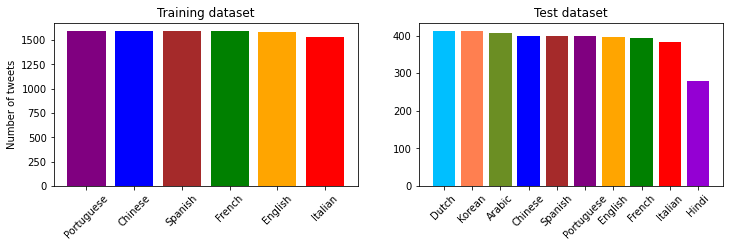

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(12, 3))
# fig.suptitle('Distribution of the languages in both subsets: training and test')
ax_train.bar(counts_train['language'], counts_train['counts'], label=counts_train['language'], color=c_train)
ax_train.set_xticklabels(counts_train['language'], rotation=45)

ax_train.set_title('Training dataset')
ax_train.set_ylabel('Number of tweets')

ax_test.bar(counts_test['language'], counts_test['counts'],label=counts_test['language'], color=c_test)
ax_test.set_xticklabels(counts_test['language'], rotation=45)
ax_test.set_title('Test dataset')



#lines = [Line2D([0], [0], color=c, linewidth=5) for c in colors]
#plt.legend(lines, dict_color.keys(), ncol=1, bbox_to_anchor=(1.04, 1), loc="upper left", fancybox=True, shadow=True)
#plt.show()


## Distribution of the intimacy scores
Now we are going to show a distribution of intimacy scores. The describe method can give us very useful information such as the maximu, minimum and the average of the intimacy scores.

In [ ]:
df_train[["label"]].describe(percentiles=[0.25,0.5,0.75,0.95])

,label
count,9491.000000
mean,2.093782
std,0.903512
min,1.000000
25%,1.400000
50%,2.000000
75%,2.666667
95%,3.800000
max,5.000000


In [ ]:
df_test[["label"]].describe(percentiles=[0.25,0.5,0.75,0.95])

,label
count,3881.000000
mean,2.126376
std,0.965148
min,1.000000
25%,1.333333
50%,2.000000
75%,2.800000
95%,4.000000
max,5.000000


We are going to plot an histogram to see this distribution better. As the maximum is 5 and minimum is 1, a bindwith of 0.5 could be a good option. 


Text(0.5, 0, 'Intimacy scores')

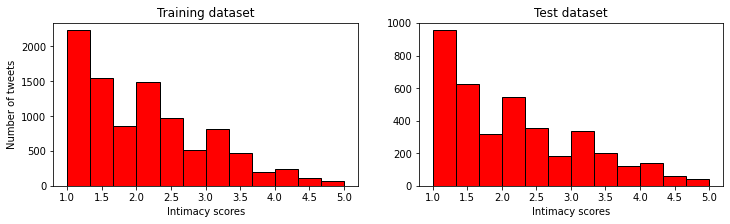

In [ ]:
import matplotlib.pyplot as plt

fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(12, 3))
# fig.suptitle('Distribution of the languages in both subsets: training and test')
ax_train.hist(df_train['label'], color = 'red', edgecolor = 'black', bins =int(6/0.5))
#ax_train.bar(counts_train.keys(), counts_train.values(), width=0.4)
#ax_train.set_xticklabels(counts_train.keys(), rotation=45)

ax_train.set_title('Training dataset')
ax_train.set_xlabel('Intimacy scores')
ax_train.set_ylabel('Number of tweets')

ax_test.hist(df_test['label'], color = 'red', edgecolor = 'black', bins =int(6/0.5))

# ax_test.bar(counts_test.keys(), counts_test.values(), width=0.4)
# ax_test.set_xticklabels(counts_test.keys(), rotation=45)

ax_test.set_title('Test dataset')
ax_test.set_xlabel('Intimacy scores')
# ax_test.set_ylabel('Number of  tweets')

Now, we show the density plot for each languages

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0, 0.5, 'Density')

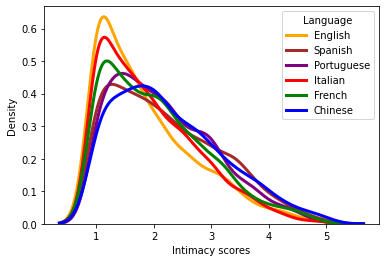

In [ ]:
import seaborn as sns
languages = df_train['language'].unique()
# Iterate through the six languages 
for name in languages:
    # Subset to the language
    subset = df_train[df_train['language'] == name]
    
    # Draw the density plot
    sns.distplot(subset['label'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = name, color = dict_color[name])
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Language')
# plt.title('Density Plot with Multiple Languages')
plt.xlabel('Intimacy scores')
plt.ylabel('Density')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0, 0.5, 'Density')

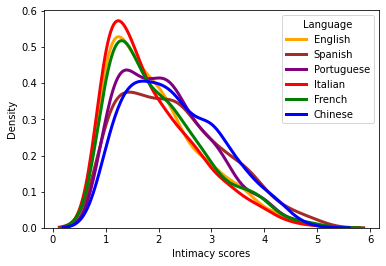

In [ ]:
# Iterate through the six languages 
for name in languages:
    # Subset to the language
    subset = df_test[df_test['language'] == name]
    
    # Draw the density plot
    sns.distplot(subset['label'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = name, color = dict_color[name])
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Language')
# plt.title('Density Plot with Multiple Languages')
plt.xlabel('Intimacy scores')
plt.ylabel('Density')

We now show the density graph for the unseen languages: 

['Hindi', 'Korean', 'Dutch', 'Arabic']


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0, 0.5, 'Density')

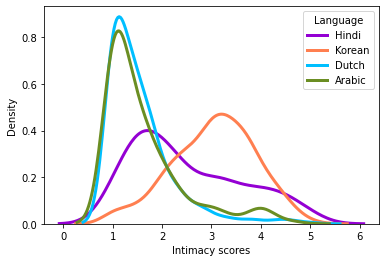

In [ ]:
# Iterate through the six languages 
print(list(set(df_test['language'].unique()) - set(languages)))
for name in list(set(df_test['language'].unique()) - set(languages)):
    # Subset to the language
    subset = df_test[df_test['language'] == name]
    
    # Draw the density plot
    sns.distplot(subset['label'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = name, color = dict_color[name])
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Language')
# plt.title('Density Plot with Multiple Languages')
plt.xlabel('Intimacy scores')
plt.ylabel('Density')

In [ ]:
subset = df_test[df_test['language'] == 'Korean']
subset.describe()


,label
count,411.000000
mean,3.046918
std,0.833734
min,1.000000
25%,2.500000
50%,3.000000
75%,3.666667
max,5.000000



Shading the density plots can help us to distinguish between overlapping distributions. For example, the following plot will show the overlapping between English and Spanish:


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

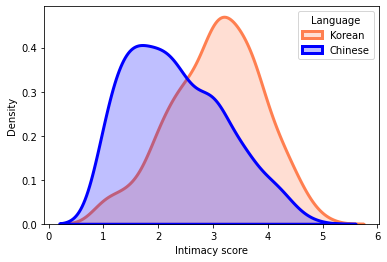

In [ ]:
# List of two languages
subsets = ['Korean', 'Chinese']

# Iterate through the five airlines
for language in subsets:
    # Subset to the airline
    subset = df_test[df_test['language'] == language]
    
    # Draw the density plot
    sns.distplot(subset['label'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = language, color = dict_color[language])
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Language')
#plt.title('Comparasion of intimacy scores  Plot with Multiple Languages')
plt.xlabel('Intimacy score')
plt.ylabel('Density')

## Distribution of the length texts (based on the number of tokens)


In [ ]:
df_train["length"]=df_train['text'].apply(lambda x: len(x.split()))
df_test["length"]=df_test['text'].apply(lambda x: len(x.split()))

# df.head()
df_test.head()

,text,label,language,length
0,@user 아..,3.0,Korean,2
1,@user @user je rêve ??,2.2,French,5
2,"thank u, nxt",1.0,English,3
3,@user ma che cosa HO FATTO,2.6,Italian,6
4,在教室打飞机，站累了，就搬凳子坐下，站着坐着都是你爸爸，听爸爸的话哦！骚货，爸爸爱你。 http,3.0,Chinese,2


In [ ]:
df_train['length'].describe(percentiles=[0, 0.25, 0.50, 0.75, 0.95])

count    9491.000000
mean        9.783690
std         6.087013
min         1.000000
0%          1.000000
25%         5.000000
50%         9.000000
75%        14.000000
95%        21.000000
max        34.000000
Name: length, dtype: float64

In [ ]:
df_test['length'].describe(percentiles=[0, 0.25, 0.50, 0.75, 0.95])

count    3881.000000
mean       10.221077
std         6.317957
min         1.000000
0%          1.000000
25%         5.000000
50%         9.000000
75%        15.000000
95%        22.000000
max        37.000000
Name: length, dtype: float64

Text(0.5, 0, 'Length (number of tokens)')

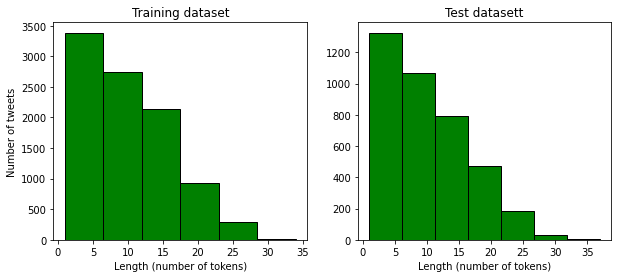

In [ ]:

fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(10, 4))
# fig.suptitle('Distribución del tamaño de los textos')

ax_train.hist(df_train['length'],  color = 'green', edgecolor = 'black',
         bins = int(34/5))
ax_train.set_title('Training dataset')
ax_train.set_xlabel('Length (number of tokens)')
ax_train.set_ylabel('Number of tweets')

ax_test.hist(df_test['length'],  color = 'green', edgecolor = 'black',
         bins = int(37/5))
ax_test.set_title('Test datasett')
ax_test.set_xlabel('Length (number of tokens)')
#ax_test.set_ylabel('Number of tweets')

In [ ]:
languages_train = list(df_train['language'].unique())


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0, 0.5, 'Density')

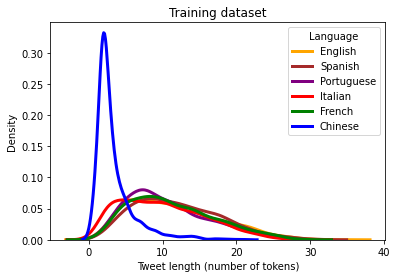

In [ ]:
# Iterate through the six languages 
for name in languages:
    # Subset to the language
    subset = df_train[df_train['language'] == name]
    
    # Draw the density plot
    sns.distplot(subset['length'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = name, color = dict_color[name])
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Language')
plt.title('Training dataset')
plt.xlabel('Tweet length (number of tokens)')
plt.ylabel('Density')

If we compare the length (number of tokens) of the tweets, we can see that Chinese tweets show a very different distribution than the romance languages. 
The minimum length (number of tokens) in Chinese tweets is 1, while the maximum length is 21. The average length is almost 4 tokens for Chinese tweets.

For romance languages, tweets are larger (if we consider the length of tweets as the number of tokens). 
Thus, the average length is 11 tokens and the maximum length is 34 tokens for tweets written in some of the romance language. 


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0, 0.5, 'Density')

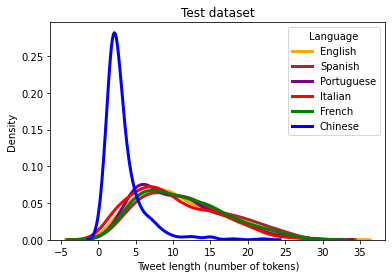

In [ ]:
# Iterate through the six languages 
for name in languages:
    # Subset to the language
    subset = df_test[df_test['language'] == name]
    
    # Draw the density plot
    sns.distplot(subset['length'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = name, color = dict_color[name])
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Language')
plt.title('Test dataset')
plt.xlabel('Tweet length (number of tokens)')
plt.ylabel('Density')

In [ ]:
for language in languages:
    print(language)
    subset = df_train['length'].where(df_train['language'] == language)
    print(subset.describe())
    print()

English
count    1587.000000
mean       11.516698
std         5.999806
min         1.000000
25%         7.000000
50%        11.000000
75%        15.000000
max        34.000000
Name: length, dtype: float64

Spanish
count    1592.000000
mean       11.932161
std         5.750669
min         1.000000
25%         7.000000
50%        11.000000
75%        16.000000
max        31.000000
Name: length, dtype: float64

Portuguese
count    1596.000000
mean       10.652882
std         5.515308
min         1.000000
25%         6.000000
50%        10.000000
75%        14.000000
max        28.000000
Name: length, dtype: float64

Italian
count    1532.000000
mean        9.969321
std         5.651399
min         1.000000
25%         5.000000
50%         9.000000
75%        14.000000
max        29.000000
Name: length, dtype: float64

French
count    1588.00000
mean       11.27204
std         5.67523
min         1.00000
25%         7.00000
50%        10.00000
75%        15.00000
max        29.00000
Name: 

In [ ]:
languages_test = list(df_test['language'].unique())
languages_test


['Korean',
 'French',
 'English',
 'Italian',
 'Chinese',
 'Spanish',
 'Hindi',
 'Arabic',
 'Portuguese',
 'Dutch']

In [ ]:
unseen_lang = set(languages_test) - set(languages)
unseen_lang

{'Arabic', 'Dutch', 'Hindi', 'Korean'}

In [ ]:
for language in unseen_lang:
    print(language)
    subset = df_test['length'].where(df_test['language'] == language)
    print(subset.describe())
    print()

Hindi
count    280.000000
mean      15.703571
std        6.598141
min        2.000000
25%       11.000000
50%       16.000000
75%       21.000000
max       30.000000
Name: length, dtype: float64

Korean
count    411.000000
mean       8.686131
std        6.594993
min        1.000000
25%        4.000000
50%        7.000000
75%       12.000000
max       37.000000
Name: length, dtype: float64

Dutch
count    413.000000
mean      11.026634
std        5.396580
min        1.000000
25%        7.000000
50%       11.000000
75%       15.000000
max       26.000000
Name: length, dtype: float64

Arabic
count    407.000000
mean      10.643735
std        6.108893
min        2.000000
25%        5.000000
50%       10.000000
75%       14.000000
max       29.000000
Name: length, dtype: float64



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0, 0.5, 'Density')

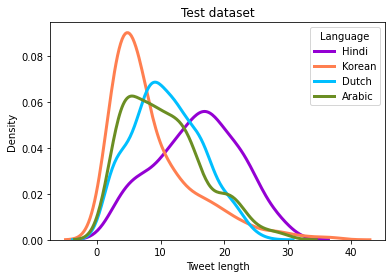

In [ ]:
# Iterate through the six languages 
for name in unseen_lang:
    # Subset to the language
    subset = df_test[df_test['language'] == name]
    
    # Draw the density plot
    sns.distplot(subset['length'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = name, color = dict_color[name])
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Language')
plt.title('Test dataset')
plt.xlabel('Tweet length')
plt.ylabel('Density')

In [ ]:
df_ch = df['length'].where(df['language'] == 'Chinese')
df_ch.describe()

count    1596.000000
mean        3.389098
std         2.653603
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        21.000000
Name: length, dtype: float64

In [ ]:
df_romance = df['length'].where(df['language'] != 'Chinese')
df_romance.describe()

count    7895.000000
mean       11.076377
std         5.760341
min         1.000000
25%         7.000000
50%        10.000000
75%        15.000000
max        34.000000
Name: length, dtype: float64